In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Import the three datasets

In [3]:
movies=pd.read_table('movies.dat',sep = '::', header=None,)
users=pd.read_table('users.dat', sep='::', header=None)
ratings=pd.read_table('ratings.dat', sep='::', header=None)

<ipython-input-3-6dadc5227234>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_table('movies.dat',sep = '::', header=None,)
<ipython-input-3-6dadc5227234>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users=pd.read_table('users.dat', sep='::', header=None)
<ipython-input-3-6dadc5227234>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_table('ratings.dat', sep='::', header=None)

In [4]:
movies.columns=['MovieID Title Genres'.split()]
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users.columns=['UserID Gender Age Occupation Zip-code'.split()]
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings.columns=['UserID MovieID Rating Timestamp'.split()]
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
#Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [8]:
data=pd.merge(movies,ratings)

In [9]:
masterdata=pd.merge(data,users)

In [10]:
#Explore the datasets using visual representations (graphs or tables)

In [11]:
masterdata.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
masterdata1=pd.DataFrame(masterdata)

In [13]:
masterdata1.columns=('MovieID','Title','Genres','UserID','Rating','Timestamp','Gender','Age','Occupation','Zip-code')

In [14]:
masterdata1.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [15]:
masterdata1.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [16]:
#User Age Distribution

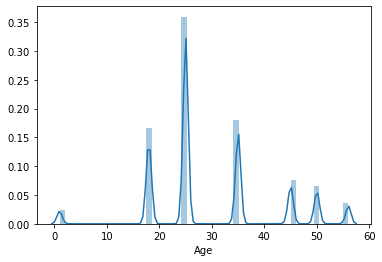

In [17]:
sns.distplot(masterdata1['Age'])

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

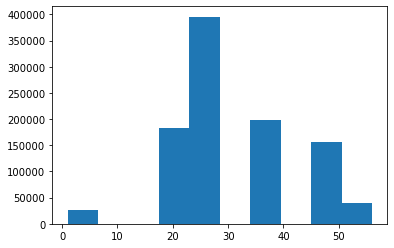

In [18]:
plt.hist(masterdata1['Age'])

In [19]:
#User rating of the movie “Toy Story”

In [20]:
masterdata1['Rating'][masterdata1['Title']=='Toy Story (1995)']

0         5
53        4
124       4
263       5
369       5
         ..
575166    5
575214    5
575485    4
575589    4
575869    3
Name: Rating, Length: 2077, dtype: int64

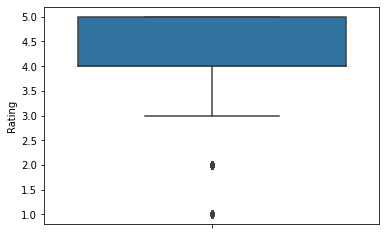

In [21]:
sns.boxplot(y=masterdata1['Rating'][masterdata1['Title']=='Toy Story (1995)'])

In [22]:
#Top 25 movies by viewership rating

In [23]:
x=masterdata1.groupby(['Title']).mean()

In [24]:
x['Rating'].sort_values(ascending=False).head(25)

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [25]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [26]:
masterdata1['Title'][masterdata1['UserID']==2696]

991035                                Client, The (1994)
991036                                  Lone Star (1996)
991037                             Basic Instinct (1992)
991038                 E.T. the Extra-Terrestrial (1982)
991039                               Shining, The (1980)
991040                         Back to the Future (1985)
991041                                   Cop Land (1997)
991042                          L.A. Confidential (1997)
991043                                  Game, The (1997)
991044            I Know What You Did Last Summer (1997)
991045                      Devil's Advocate, The (1997)
991046    Midnight in the Garden of Good and Evil (1997)
991047                                   Palmetto (1998)
991048                                Wild Things (1998)
991049                          Perfect Murder, A (1998)
991050      I Still Know What You Did Last Summer (1998)
991051                                     Psycho (1998)
991052                         

In [27]:
#Feature Engineering:
            #Use column genres:

In [28]:
#Find out all the unique genres

In [29]:
genres=pd.Series(masterdata1['Genres']).str.split(r"|", expand=True)

In [30]:
genres.head()

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Animation,Children's,Musical,Romance,None,None
2,Drama,None,None,None,None,None
3,Action,Adventure,Fantasy,Sci-Fi,None,None
4,Drama,War,None,None,None,None


In [31]:
genres=genres.fillna(value=0)

In [32]:
result = pd.DataFrame(data=pd.concat([genres[0],genres[1],genres[2],genres[3],genres[4],genres[5]], axis=0))

In [33]:
result

,0
0,Animation
1,Animation
2,Drama
3,Action
4,Drama
...,...
1000204,0
1000205,0
1000206,0
1000207,0


In [34]:
result[0].unique()

array(['Animation', 'Drama', 'Action', "Children's", 'Crime', 'Musical',
       'Adventure', 'Comedy', 'Romance', 'Thriller', 'Western',
       'Documentary', 'Sci-Fi', 'Horror', 'Film-Noir', 'Mystery', 'War',
       'Fantasy', 0], dtype=object)

In [35]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [36]:
pd.DataFrame([genres[0].unique(),genres[1].unique(),genres[2].unique(),genres[3].unique(),genres[4].unique(),genres[5].unique()]).T

,0,1,2,3,4,5
0,Animation,Children's,Comedy,0,0,0
1,Drama,0,Musical,Romance,Musical,War
2,Action,Adventure,0,Sci-Fi,War,None
3,Children's,War,Fantasy,Musical,Romance,None
4,Crime,Drama,Thriller,Comedy,Sci-Fi,None
5,Musical,Comedy,Drama,Western,Thriller,None
6,Adventure,Romance,Children's,Thriller,Fantasy,None
7,Comedy,Sci-Fi,War,War,None,None
8,Romance,Animation,Romance,Mystery,None,None
9,Thriller,Crime,Western,Crime,None,None


In [37]:
y=pd.get_dummies(genres[0])
y1=pd.get_dummies(genres[1])
y2=pd.get_dummies(genres[2])
y3=pd.get_dummies(genres[3])
y4=pd.get_dummies(genres[4])
y5=pd.get_dummies(genres[5])


In [38]:
y1=y1.assign(Action=0)
y2=y2.assign(Action=0,Adventure=0,Documentary=0)
y3['Film-Noir']=0
y3=y3.assign(Animation=0,Action=0,Adventure=0,Documentary=0,)
y4["Children's"]=0
y4['Film-Noir']=0
y4=y4.assign(Animation=0,Drama=0,Action=0,Crime=0,Adventure=0,Comedy=0,Western=0,Documentary=0,Horror=0,Mystery=0)
y5["Children's"]=0
y5['Sci-Fi']=0
y5['Film-Noir']=0
y5=y5.assign(Animation=0, Drama=0,Action=0,Crime=0,Musical=0,Adventure=0,Comedy=0,Romance=0,Thriller=0,Western=0,Documentary=0,Horror=0,Mystery=0,Fantasy=0)

In [39]:
one_hot_encoded=y+y2+y1+y3+y4+y5

In [40]:
one_hot_encoded.drop(columns=0, inplace=True)

In [41]:
one_hot_encoded.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [42]:
masterdata=masterdata1.merge(one_hot_encoded,how="outer", left_index=True, right_index=True)

In [43]:
#Determine the features affecting the ratings of any particular movie.

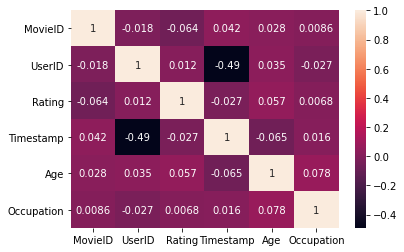

In [44]:
sns.heatmap(masterdata1.corr(),annot=True)

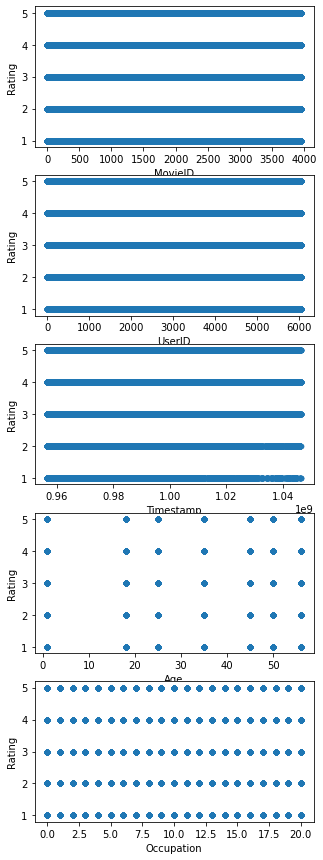

In [45]:
fig,axs=plt.subplots(5,1 , sharey=True)
masterdata1.plot(kind='scatter', x='MovieID',y='Rating', ax=axs[0], figsize=(5,15))
masterdata1.plot(kind='scatter', x='UserID',y='Rating', ax=axs[1], figsize=(5,15))
masterdata1.plot(kind='scatter', x='Timestamp',y='Rating', ax=axs[2], figsize=(5,15))
masterdata1.plot(kind='scatter', x='Age',y='Rating', ax=axs[3], figsize=(5,15))
masterdata1.plot(kind='scatter', x='Occupation',y='Rating', ax=axs[4], figsize=(5,15))


In [46]:
#Develop an appropriate model to predict the movie ratings

In [47]:
#as par trainer one should not do the above problem as it is an machine leaning part and not to be included with data science with python still just for a try i did it

In [48]:
fc=['MovieID','UserID','Timestamp','Age','Occupation']
x=masterdata1[fc]
y=masterdata1.Rating

In [49]:
x.shape

(1000209, 5)

In [50]:
y.shape

(1000209,)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm=LinearRegression()

In [55]:
lm.fit(x_train,y_train)

LinearRegression()

In [56]:
lm.coef_

array([-6.59037814e-05, -5.26869424e-07, -1.85847093e-09,  5.36990972e-03,
        5.56399658e-04])

In [57]:
lm.intercept_

5.34911446567329

In [58]:
y_pred=lm.predict(x_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test,y_pred)

0.008250694153402183